In [1]:
#Importing relevant package 
import pandas as pd

#Retrieving data from top5 european league players

url = "https://fbref.com/en/comps/Big5/2023-2024/stats/players/2023-2024-Big-5-European-Leagues-Stats"

df = pd.read_html(url, attrs={"id": "stats_standard"})

#Getting the first item from the list
df = df[0]

#Displaying dataset
df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk             Player             Nation                Pos   
0                  1         Max Aarons            eng ENG                 DF   
1                  2   Brenden Aaronson             us USA              MF,FW   
2                  3    Paxten Aaronson             us USA                 MF   
3                  4  Keyliane Abdallah             fr FRA                 FW   
4                  5   Yunis Abdelhamid             ma MAR                 DF   

  Unnamed: 4_level_0  Unnamed: 5_level_0 Unnamed: 6_level_0  \
               Squad                Comp                Age   
0        Bournemouth  eng Premier League                 23   
1       Union Berlin       de Bundesliga                 22   
2     Eint Frankfurt       de Bundesliga                 19   
3          Marseille          fr Ligue 1                 17   
4              Reims          fr Ligue 1                 35   

  Unnamed: 7_level_0 Playing Time         ... Per 90 Minutes              \
                Born           MP Starts  ...            Ast   G+A  G-PK   
0               2000           20     13  ...           0.07  0.07  0.00   
1               2000           30     14  ...           0.14  0.28  0.14   
2               2003            7      1  ...           0.89  0.89  0.00   
3               2006            1      0  ...           0.00  0.00  0.00   
4               1987           31     31  ...           0.00  0.13  0.10   

                                           Unnamed: 37_level_0  
  G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG             Matches  
0   0.07  0.00  0.06   0.06  0.00     0.06             Matches  
1   0.28  0.14  0.13   0.27  0.14     0.27             Matches  
2   0.89  0.11  0.07   0.19  0.11     0.19             Matches  
3   0.00  0.00  0.00   0.00  0.00     0.00             Matches  
4   0.10  0.11  0.01   0.12  0.09     0.09             Matches  

[5 rows x 38 columns]

In [3]:
#Dropping per 90 stats and creating our own later
df = df[df.columns.drop(list(df.filter(regex='Per 90')))]

#Dropping top header that we dont need
df = df.droplevel(0, axis = 1)

#Filtering for position, Forward
df = df[df['Pos'].str.contains('FW')]

#Casting datatype to integer (number)
#Filtering for players that have played more than 900 minutes (10 full games)
df = df[df['Min'].astype(int) > 900]

#Casting more datatypes
df[['90s', 'xG', 'xAG']] = df[['90s', 'xG', 'xAG']].astype(float)

df[['Gls', 'Ast', 'G+A', 'PrgC', 'PrgP', 'PrgR']] = df[['Gls', 'Ast', 'G+A', 'PrgC', 'PrgP', 'PrgR']].astype(int)

#Calculating per 90 metrics
df['goals_per_90'] = df['Gls'] / df['90s']
df['assists_per_90'] = df['Ast'] / df['90s']
df['goals_assists_per_90'] = df['G+A'] / df['90s']
df['progressive_carries_per_90'] = df['PrgC'] / df['90s']
df['progressive_passes_per_90'] = df['PrgP'] / df['90s']
df['progressive_receptions_per_90'] = df['PrgR'] / df['90s']
df['expected_goals_per_90'] = df['xG'] / df['90s']
df['expected_assists_per_90'] = df['xAG'] / df['90s']

#Sorting top 5 strikers based on xG per 90
df_sorted = df.sort_values(by='expected_goals_per_90', ascending=False)
df_sorted[['Player', 'Gls', 'Ast', 'G+A', 'expected_goals_per_90']].head()

,Player,Gls,Ast,G+A,expected_goals_per_90
1120,Erling Haaland,27,5,32,1.028169
1344,Harry Kane,36,8,44,0.971429
350,Victor Boniface,14,8,22,0.895349
1754,Kylian Mbappé,27,7,34,0.875000
1102,Serhou Guirassy,28,3,31,0.848980


In [5]:
from mplsoccer import Radar
from mplsoccer import PyPizza
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import matplotlib.font_manager as font_manager

font_path = 'Arvo-Regular.ttf'
font_props = font_manager.FontProperties(fname=font_path)

#Percentiles calculation 

df['Goals'] = (df['goals_per_90'].rank(pct=True) * 100).astype(int)
df['Assists'] = (df['assists_per_90'].rank(pct=True) * 100).astype(int)
df['Goals + Assists'] = (df['goals_assists_per_90'].rank(pct=True) * 100).astype(int)
df['Progressive Carries'] = (df['progressive_carries_per_90'].rank(pct=True) * 100).astype(int)
df['Progressive Passes'] = (df['progressive_passes_per_90'].rank(pct=True) * 100).astype(int)
df['Progressive Receptions'] = (df['progressive_receptions_per_90'].rank(pct=True) * 100).astype(int)
df['Expected Goals'] = (df['expected_goals_per_90'].rank(pct=True) * 100).astype(int)
df['Expected Assists'] = (df['expected_assists_per_90'].rank(pct=True) * 100).astype(int)

#Filtering and sorting which columns to use in radar
columns_to_plot = [
    'Goals', 'Assists', 'Goals + Assists',
    'Progressive Carries', 'Progressive Passes', 'Progressive Receptions',
    'Expected Goals', 'Expected Assists'
]

#Creating min and max value for radar
radar = Radar(
    params=columns_to_plot,
    min_range=[0 for _ in columns_to_plot],
    max_range=[100 for _ in columns_to_plot]
)

#Players to plot
haaland = df[df['Player'] == 'Erling Haaland']
mbappe = df[df['Player'] == 'Kylian Mbappé']
kane = df[df['Player'] == 'Harry Kane']
guirassy = df[df['Player'] == 'Serhou Guirassy']
boniface = df[df['Player'] == 'Victor Boniface']

Text(0.5, -0.1, 'Data: FBref, Compared with Forwards in Top5 Leagues 2024')

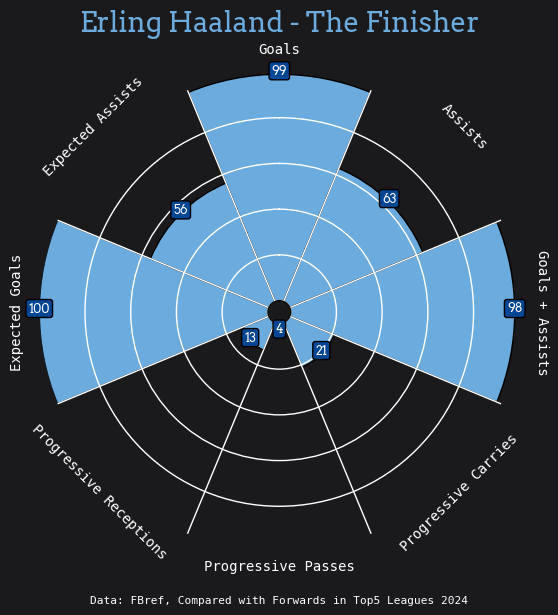

In [7]:
# Setup the pizza plot
pizza = PyPizza(
    params=columns_to_plot,
    background_color='#1A1A1D',
    straight_line_color='white',
    straight_line_lw=1,
    last_circle_lw=0,
    other_circle_color='white',
    other_circle_ls='-',
    other_circle_lw=1
)

# Create the figure and plot
fig, ax = pizza.make_pizza(
    figsize=(8, 8),  # Increase the figure size
    values=list(haaland[columns_to_plot].values.flatten()),
    kwargs_values=dict(
        color='#FFFFFF', fontsize=9, fontproperties=font_props, 
        bbox={
            'edgecolor': 'black',
            'facecolor': '#034694',    #A52A2A  #8B0000
            "boxstyle": 'round, pad= .2',
            "lw": 1
        }
    ),

    kwargs_slices=dict(
        facecolor="#6CABDD",  # New color (example: red)
        edgecolor="black",  # White edge for the slices
        linewidth=1
    ),

    kwargs_params=dict(
        color='#FFFFFF',  # White color for the labels (change as needed)
        fontsize=10,  # Font size for the labels
        fontproperties='monospace' # Custom font
    )
)

# Adjust the margins to add space around the plot
fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure

# Add the title
ax.text(x=.5, y=1.1, s='Erling Haaland - The Finisher', fontsize=20, c='#6CABDD', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)

ax.text(
    x=.5, y=-0.1,  # Position below the plot (adjust y as needed)
    s='Data: FBref, Compared with Forwards in Top5 Leagues 2024',  # Example subtext
    fontsize=8,  # Smaller font size for subtext
    color='#FFFFFF',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties='monospace', 
    transform=ax.transAxes
)

Text(0.5, -0.1, 'Data: FBref, Compared with Forwards in Top5 Leagues 2024')

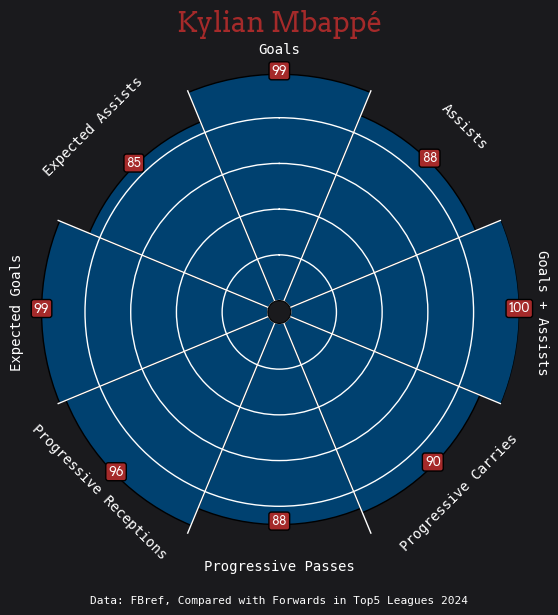

In [9]:
# Setup the pizza plot
pizza = PyPizza(
    params=columns_to_plot,
    background_color='#1A1A1D',
    straight_line_color='white',
    straight_line_lw=1,
    last_circle_lw=0,
    other_circle_color='white',
    other_circle_ls='-',
    other_circle_lw=1
)

# Create the figure and plot
fig, ax = pizza.make_pizza(
    figsize=(8, 8),  # Increase the figure size
    values=list(mbappe[columns_to_plot].values.flatten()),
    kwargs_values=dict(
        color='#FFFFFF', fontsize=9, fontproperties=font_props, 
        bbox={
            'edgecolor': 'black',
            'facecolor': '#A52A2A',    #A52A2A  #8B0000
            "boxstyle": 'round, pad= .2',
            "lw": 1
        }
    ),

    kwargs_slices=dict(
        facecolor="#004170",  # New color (example: red)
        edgecolor="black",  # White edge for the slices
        linewidth=1
    ),

    kwargs_params=dict(
        color='#FFFFFF',  # White color for the labels (change as needed)
        fontsize=10,  # Font size for the labels
        fontproperties='monospace' # Custom font
    )
)

# Adjust the margins to add space around the plot
fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure

# Add the title
ax.text(x=.5, y=1.1, s='Kylian Mbappé', fontsize=20, c='#A52A2A', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)

ax.text(
    x=.5, y=-0.1,  # Position below the plot (adjust y as needed)
    s='Data: FBref, Compared with Forwards in Top5 Leagues 2024',  # Example subtext
    fontsize=8,  # Smaller font size for subtext
    color='#FFFFFF',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties='monospace', 
    transform=ax.transAxes
)

Text(0.5, -0.1, 'Data: FBref, Compared with Forwards in Top5 Leagues 2024')

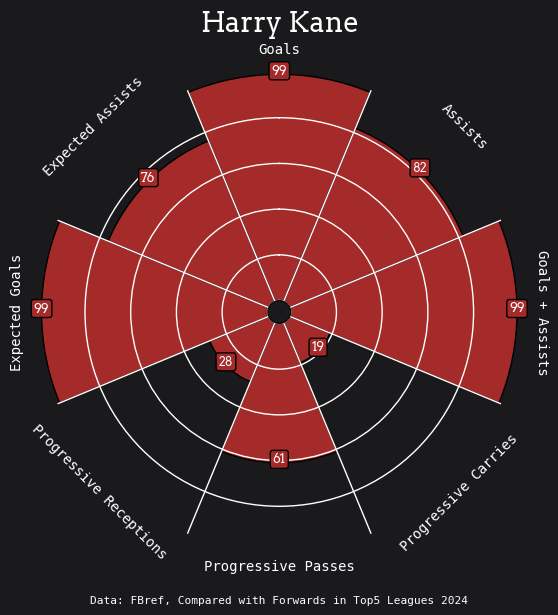

In [11]:
# Setup the pizza plot
pizza = PyPizza(
    params=columns_to_plot,
    background_color='#1A1A1D',
    straight_line_color='white',
    straight_line_lw=1,
    last_circle_lw=0,
    other_circle_color='white',
    other_circle_ls='-',
    other_circle_lw=1
)

# Create the figure and plot
fig, ax = pizza.make_pizza(
    figsize=(8, 8),  # Increase the figure size
    values=list(kane[columns_to_plot].values.flatten()),
    kwargs_values=dict(
        color='#FFFFFF', fontsize=9, fontproperties=font_props, 
        bbox={
            'edgecolor': 'black',
            'facecolor': '#A52A2A',    #A52A2A  #8B0000
            "boxstyle": 'round, pad= .2',
            "lw": 1
        }
    ),

    kwargs_slices=dict(
        facecolor="#A52A2A",  # New color (example: red)
        edgecolor="black",  # White edge for the slices
        linewidth=1
    ),

    kwargs_params=dict(
        color='#FFFFFF',  # White color for the labels (change as needed)
        fontsize=10,  # Font size for the labels
        fontproperties='monospace' # Custom font
    )
)

# Adjust the margins to add space around the plot
fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure

# Add the title
ax.text(x=.5, y=1.1, s='Harry Kane', fontsize=20, c='#FFFFFF', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)

ax.text(
    x=.5, y=-0.1,  # Position below the plot (adjust y as needed)
    s='Data: FBref, Compared with Forwards in Top5 Leagues 2024',  # Example subtext
    fontsize=8,  # Smaller font size for subtext
    color='#FFFFFF',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties='monospace', 
    transform=ax.transAxes
)

In [15]:
#More players to choose from
df.Player.unique()

array(['Brenden Aaronson', 'Matthis Abline', 'Akor Adams',
       'Elijah Adebayo', 'Karim Adeyemi', 'Simon Adingra',
       'Tosin Aiyegun', 'Ludovic Ajorque', 'Ilias Akhomach',
       'Maghnes Akliouche', 'Faride Alidou', 'Nabil Alioui',
       'Domingos André Ribeiro Almeida', 'Miguel Almirón',
       'Pontus Almqvist', 'Julián Álvarez', 'Zeki Amdouni',
       'Elliot Anderson', 'Felipe Anderson', 'Ângelo', 'Michail Antonio',
       'Antony', 'Christopher Antwi-Adjei', 'Cameron Archer',
       'José Arnaiz', 'Hákon Arnar Haraldsson', 'Sergio Arribas',
       'Takuma Asano', 'Marco Asensio', 'Iago Aspas', 'Arthur Atta',
       'Pierre-Emerick Aubameyang', 'Taiwo Awoniyi', 'André Ayew',
       'Jordan Ayew', 'Alex Baena', 'Leon Bailey', 'Nedim Bajrami',
       'Dilane Bakwa', 'Folarin Balogun', 'Jonathan Bamba',
       'Mohamed Bamba', 'Lameck Banda', 'Léo Baptistão',
       'Bradley Barcola', 'Ander Barrenetxea', 'Christoph Baumgartner',
       'Ihlas Bebou', 'Adrian Beck', 'Kevin Be

In [17]:
#Sorting top 5 strikers based on xG per 90
df_sorted = df.sort_values(by='Expected Goals', ascending=False)
df_sorted[['Player', 'Gls', 'Ast', 'G+A', 'Expected Goals']].head(5)

,Player,Gls,Ast,G+A,Expected Goals
1120,Erling Haaland,27,5,32,100
1344,Harry Kane,36,8,44,99
350,Victor Boniface,14,8,22,99
1102,Serhou Guirassy,28,3,31,99
1754,Kylian Mbappé,27,7,34,99


In [46]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Matches', 'goals_per_90', 'assists_per_90', 'goals_assists_per_90',
       'progressive_carries_per_90', 'progressive_passes_per_90',
       'progressive_receptions_per_90', 'expected_goals_per_90',
       'expected_assists_per_90', 'Goals', 'Assists', 'Goals + Assists',
       'Progressive Carries', 'Progressive Passes', 'Progressive Receptions',
       'Expected Goals', 'Expected Assists'],
      dtype='object')